### Description

__Task 3__: Communication system with FSK modulation/demodulation

Modulate and demodulate frequency shift keying (FSK) signal from a random binary sequence
1. __Modulation__: To perform the FSK modulation, the following instruction may be useful
- Generate and plot the carrier signal(s)
- Generate and plot the binary data sequence
- Perform FSK modulation and plot the FSK modulated signal
2. __Demodulation__: To perform the FSK demodulation, the following instruction may be useful
- Correlate the FSK modulated signal with the carrier signal to generate decision variables
- Obtain the demodulated binary data based on the decision variables
3. __Investigate the FSK modulation/demodulation under the effects of Gaussian noise__, the
following instruction may be useful
- Gaussian noise with zero mean and variance $\frac{N_0}{2}$ is added to the transmitted waveform as
$r(t) = s(t) + n(t)$
- Numerically compute the error probability
4. __Theory__: Derive the bit error probability of a Gaussian channel using the FSK
modulation/demodulation used in your task

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

np.random.seed(2023)
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# Initialize parameters for 2-FSK

n = 500                                 # Number of bits
x = np.random.randint(2, size=n)        # Binary signal
Tb = 0.001;                             # Bit period (second)
nb = 100;                               # Number of samples per bit
br = 1 / Tb;                            # Bit rate (Hz)
f1 = 2 * br;                            # Carrier frequency (Hz)
f2 = 4 * br;                            # Carrier frequency (Hz)
t = Tb * np.arange(0, n, 1 / nb)
# sampling_rate = nb / Tb

### 1. Modulation

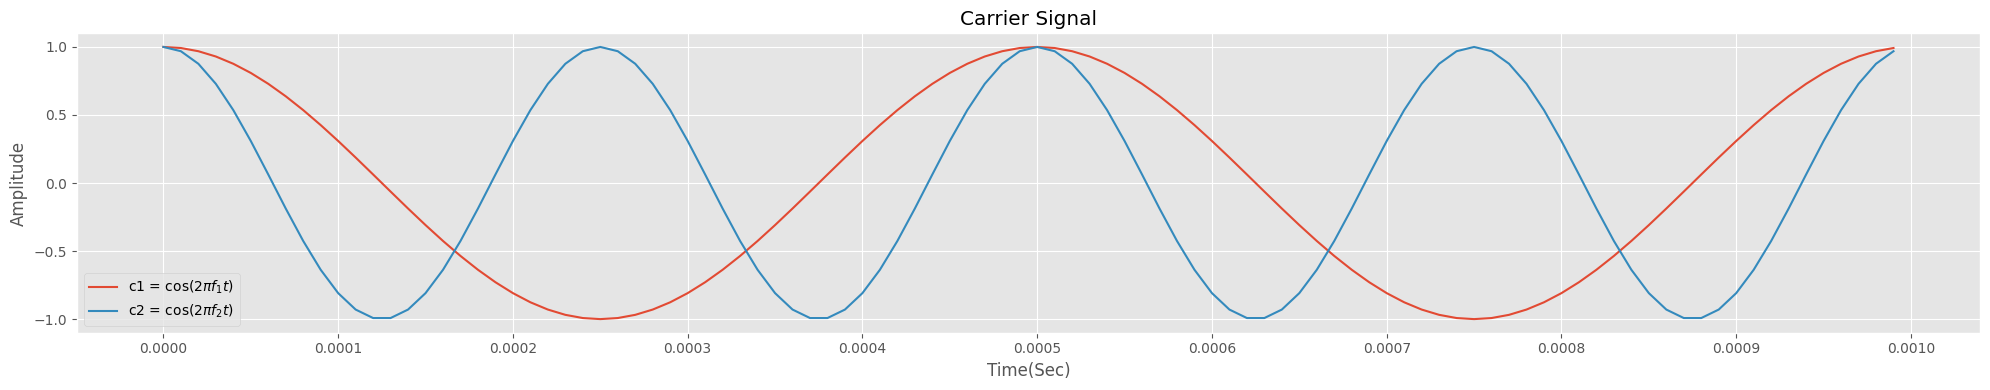

In [ ]:
# Generate and plot the carrier signal(s)
# Define the carrier signal, c1 and c2 are orthogonal
c1 = np.cos(2 * np.pi * f1 * t);    # carrier signal for bits 0
c2 = np.cos(2 * np.pi * f2 * t);    # carrier signal for bits 1

# Plot the carrier signal for 1 bit period
plt.figure(figsize=(20,4))
t_  = Tb * np.arange(0, 1, 1 / 100)
plt.plot(t_, np.cos(2 * np.pi * f1 * t_))
plt.plot(t_, np.cos(2 * np.pi * f2 * t_))
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, Tb + Tb / 10, Tb / 10))
plt.yticks(np.arange(-1, 1.5, 0.5))
plt.grid(True)
plt.title('Carrier Signal')
plt.legend(['c1 = $\cos(2\pi f_1 t$)','c2 = $\cos(2\pi f_2 t)$'])
plt.tight_layout()
plt.savefig('carrier_fsk.png')
plt.show()

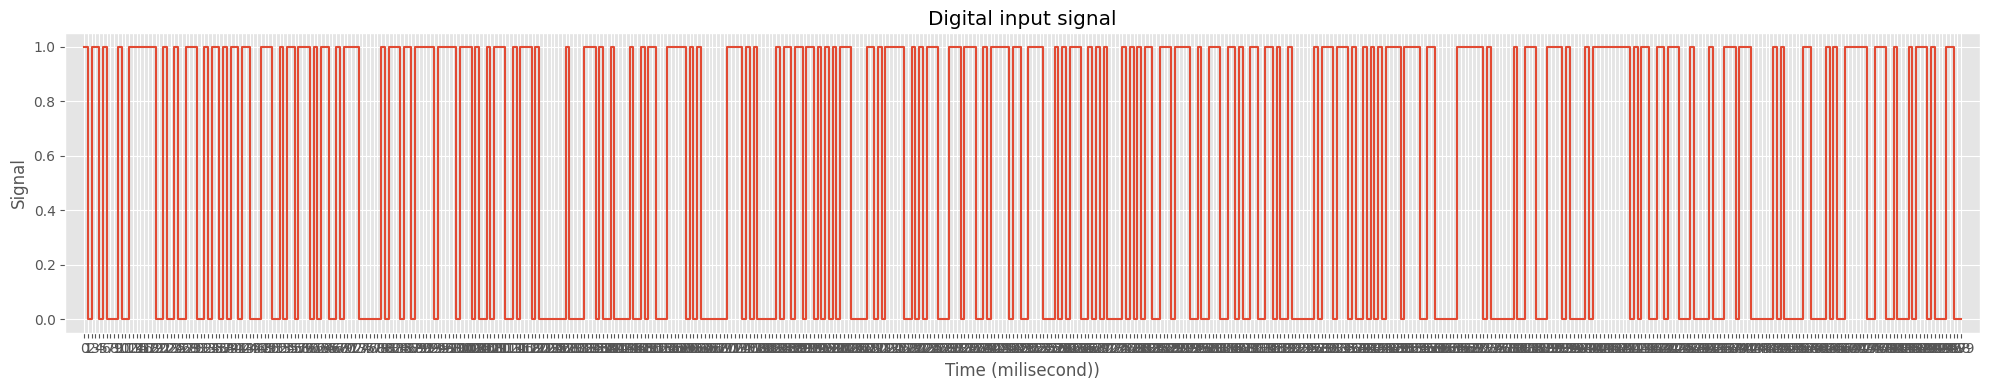

In [ ]:
# Plot the binary data signal
plt.figure(figsize = (20, 4))
plt.title('Digital input signal')
plt.xticks(1000 * np.arange(0, Tb * n, Tb))
plt.xlabel('Time (milisecond))')
plt.ylabel('Signal')
plt.step(1000  * np.arange(0, Tb * n, Tb), x)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.tight_layout()
plt.savefig('sequence_fsk.png')
plt.show()

In [ ]:
# Generate the binary data sequence
digit = np.empty(shape=0, dtype=int);
for i in range(n):
    if x[i] == 1:
        digit = np.append(digit, np.ones(nb))
    else:
        digit = np.append(digit, np.zeros(nb))

# Perform FSK modulation and plot the FSK modulated signal
mod = np.where(digit==0, c1, digit*c2)

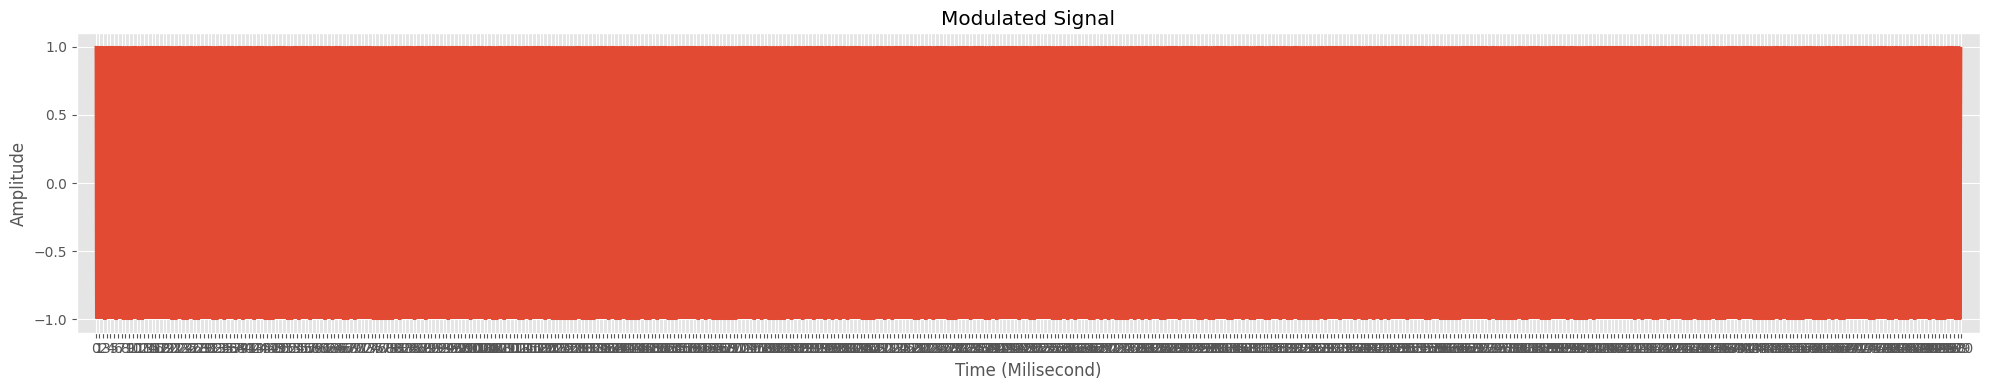

In [ ]:
# Plot the FSK modulated signal
plt.figure(figsize=(20, 4))
plt.plot(1000 * t, mod)
plt.xlabel('Time (Milisecond)')
plt.ylabel('Amplitude')
plt.xticks(1000 * np.arange(0, Tb * n + Tb, Tb))
plt.yticks(np.arange(-1, 1.5, 0.5))
plt.grid(True)
plt.title('Modulated Signal')
plt.margins(x=0.01, y=0.05)
plt.tight_layout()
plt.savefig('modulated_fsk.png')
plt.show()

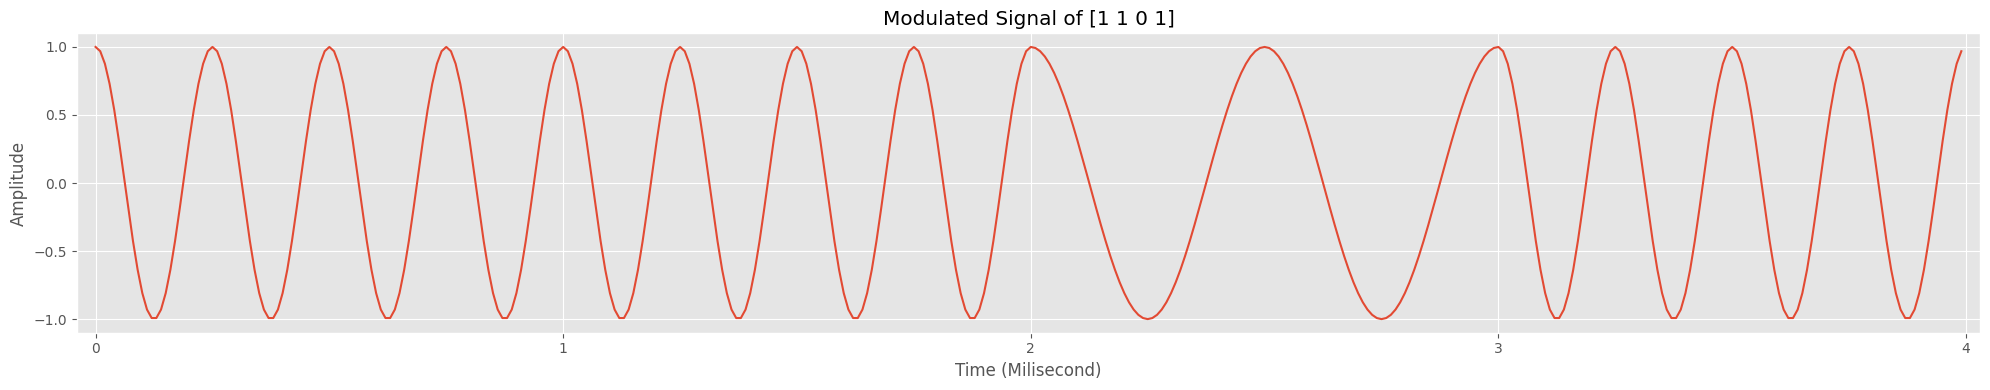

In [ ]:
# Example when n = 4
plt.figure(figsize=(20, 4))
plt.plot(1000 * t[:4*nb], mod[:4*nb])
plt.xlabel('Time (Milisecond)')
plt.ylabel('Amplitude')
plt.xticks(1000 * np.arange(0, Tb * 4 + Tb, Tb))
plt.yticks(np.arange(-1, 1.5, 0.5))
plt.grid(True)
plt.title(f'Modulated Signal of {x[:4]}')
plt.margins(x=0.01, y=0.05)
plt.tight_layout()
plt.savefig('example_fsk.png')
plt.show()

### 2. Demodulation

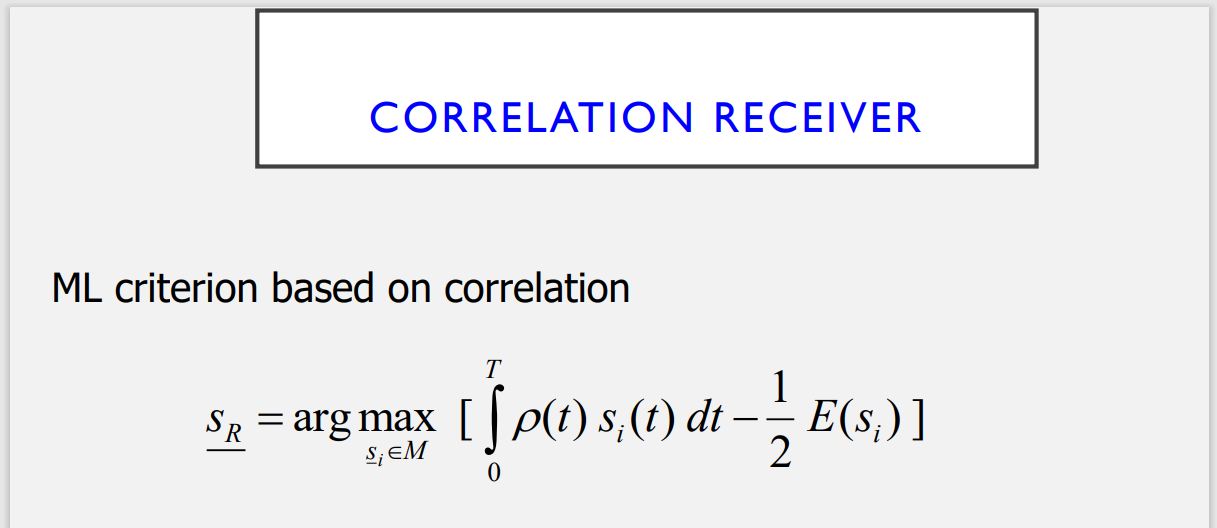

In [ ]:
def demodulate(mod):
    """
    Function to demodulate the signal following ML criterion
    """
    demod = np.empty(shape=n, dtype=int)

    for i in range(0, n * nb, nb):
        I1 = np.trapz(mod[i:i + nb] * c1[i:i + nb], t[i:i+nb])
        e1 = np.trapz(c1[i:i + nb] ** 2, t[i:i+nb])
        I2 = np.trapz(mod[i:i + nb] * c2[i: i + nb], t[i:i+nb])
        e2 = np.trapz(c2[i:i + nb] ** 2, t[i:i+nb])
        if I1 - 1/2 * e1 > I2 - 1/2 * e2:
            demod[i // nb] = 0
        else:
            demod[i // nb] = 1
    return demod

In [ ]:
# Demodulate the signal
demod = demodulate(mod)

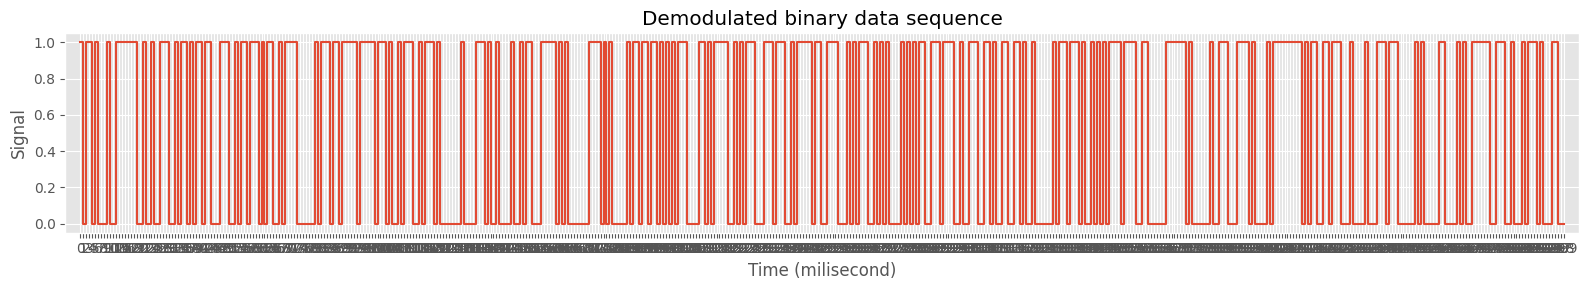

In [ ]:
# Plot the demodulated binary data sequence
plt.figure(figsize = (16, 3))
plt.title('Demodulated binary data sequence')
plt.xticks(1000 * np.arange(0, Tb*n, Tb))
plt.xlabel('Time (milisecond)')
plt.ylabel('Signal')
plt.step(1000*np.arange(0,Tb*n, Tb), demod)
plt.margins(x=0.01, y=0.05)
plt.tight_layout()
plt.savefig('demodulated_fsk.png')
plt.grid(True)

### 3. FSK modulation/demodulation under the effects of Gaussian noise

In [ ]:
def add_awgn(mod, std):
    noise = np.random.normal(0, std, len(mod))
    return mod + noise

# add Gaussian noise with zero mean and variance N0/2 to the transmitted waveform
N0 = 18
standard_deviation = np.sqrt(N0 / 2)  # Equals 3
mod_noise = add_awgn(mod, standard_deviation)

# Demodulate the signal with AWGN
demod_noise = demodulate(mod_noise)

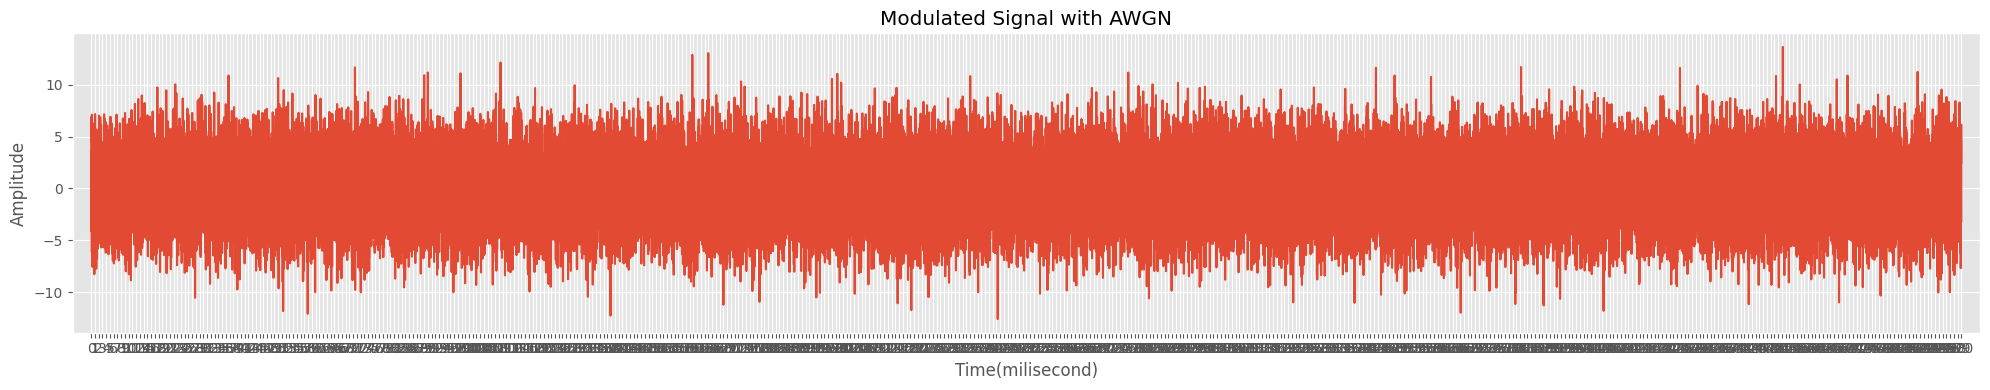

In [ ]:
# plot the modulated signal with AWGN
plt.figure(figsize=(20,4))
plt.plot(1000 * t, mod_noise)
plt.xlabel('Time(milisecond)')
plt.ylabel('Amplitude')
plt.xticks(1000*np.arange(0, Tb * n + Tb, Tb))
# plt.yticks(np.arange(-1,1.5,0.5))
plt.grid(True)
plt.title('Modulated Signal with AWGN')
plt.margins(x=0.01, y=0.05)
plt.tight_layout()
plt.savefig('awgn_modulated_fsk.png')
plt.show()

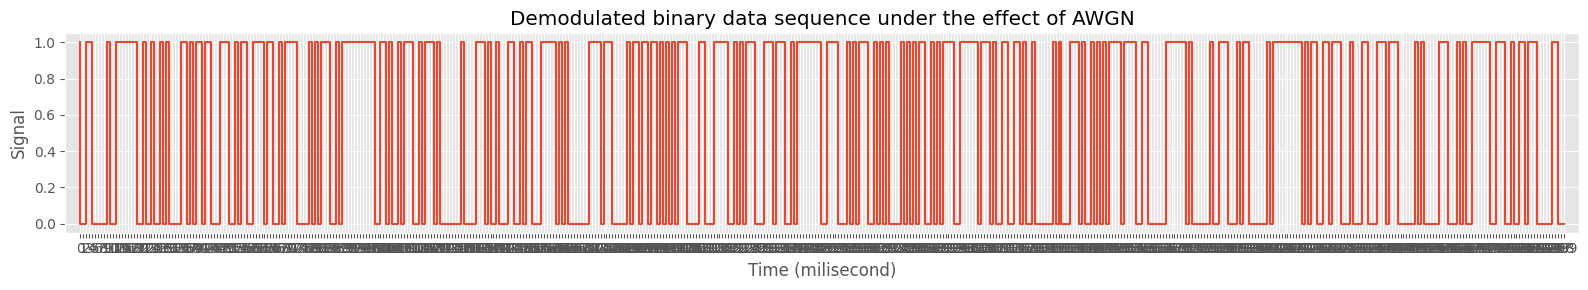

In [ ]:
# Plot the demodulated binary data sequence under the effect of AWGN
plt.figure(figsize = (16, 3))
plt.title('Demodulated binary data sequence under the effect of AWGN')
plt.xticks(1000*np.arange(0,Tb*n,Tb))
plt.xlabel('Time (milisecond)')
plt.ylabel('Signal')
plt.step(1000*np.arange(0,Tb*n,Tb), demod_noise)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.tight_layout()
plt.savefig('awgn_demodulated_fsk.png')
plt.show()

In [ ]:
E1 = np.trapz((c1**2)[0:nb])    # energy per bit for binary value '0'
E2 = np.trapz((c2**2)[0:nb])    # energy per bit for binary value '1'
Eb = 1/2 * (E1 + E2)            # energy per bit

error_bits = np.count_nonzero(demod_noise - x)
Pb = error_bits / len(x)
print(error_bits)
print(f"Bit Error Probability: {Pb*100}%")
print(f"Bit Error Probability in theory: {1/2 * erfc(np.sqrt(Eb / N0 / 2)) * 100}%")

26
Bit Error Probability: 5.2%
Bit Error Probability in theory: 4.944670263850942%
